In [3]:
import os
import sys
import numpy as np
import pandas as pd
module_path = os.path.abspath(os.path.join('../utils/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from log_detection import LogPosition

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [4]:
data_path = '/Volumes/Seagate Backup Plus Drive/connected_worlds_water/'
if2 = '/Volumes/Seagate Backup Plus Drive/connected_worlds_water/water_level_4/2017-09-19T15_16_53-0.csv'
interesting_file_path = 'water_level_3/2017-09-19T10_01_14-0.mov'
interesting_file_path_csv = 'water_level_3/2017-09-19T10_01_14-0.csv'

In [3]:
log_detector = LogPosition()
log_detector.load_mov_file(data_path + interesting_file_path)
log_detector.infer_log_positions_over_time()
log_positions = log_detector.get_log_positions_DF()
log_actions = log_detector.get_actions()

In [12]:
data = pd.read_csv(if2)
# data = pd.read_csv('./../water_path_detection/2017-09-19T10_01_14-0.mov')
data.columns = data.columns.str.strip()
water_subset = data[data.columns[data.columns.str.contains('Water') & (~data.columns.str.contains('Bins|Waterfall|Floor|Mountain|Reservoir'))]]

In [13]:
series_diff = pd.read_pickle('./../water_path_detection/diff_series.pkl')

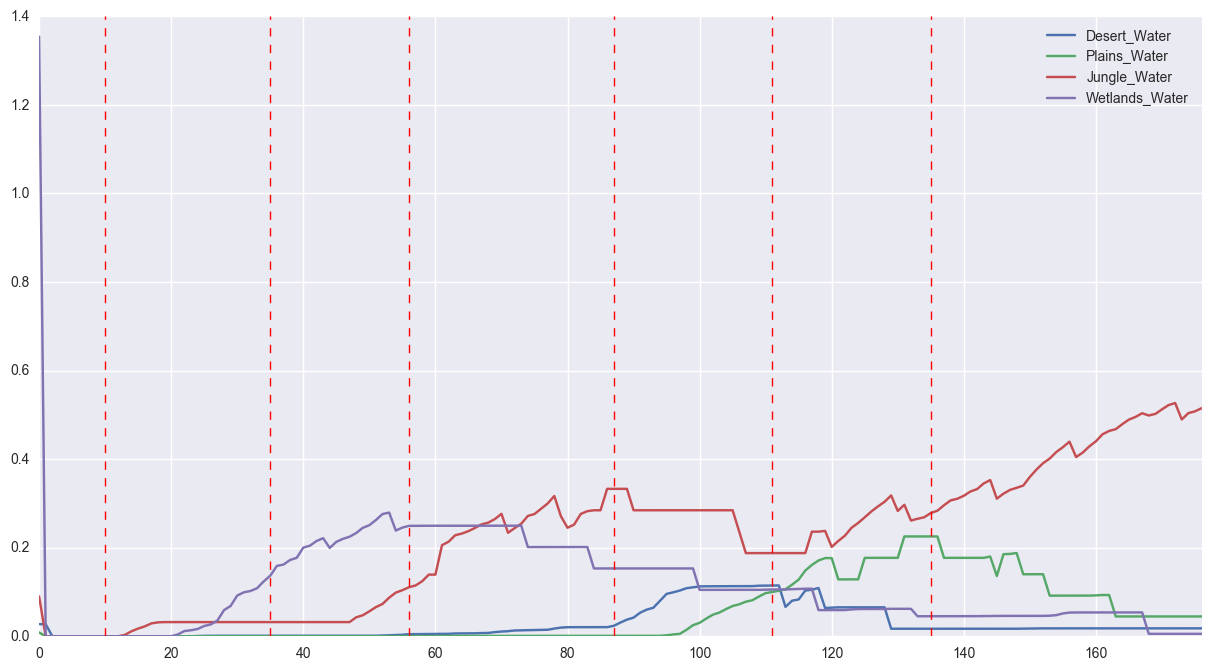

In [14]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
count = 10
water_subset[water_subset.columns[~water_subset.columns.isin(['Total_Water'])]].plot(ax=ax)

for ix,v in series_diff.iteritems():
    count += 1
    if v == True and count > 20:
        ax.axvline(ix, color='r', linestyle='--', lw=1)
        count = 0

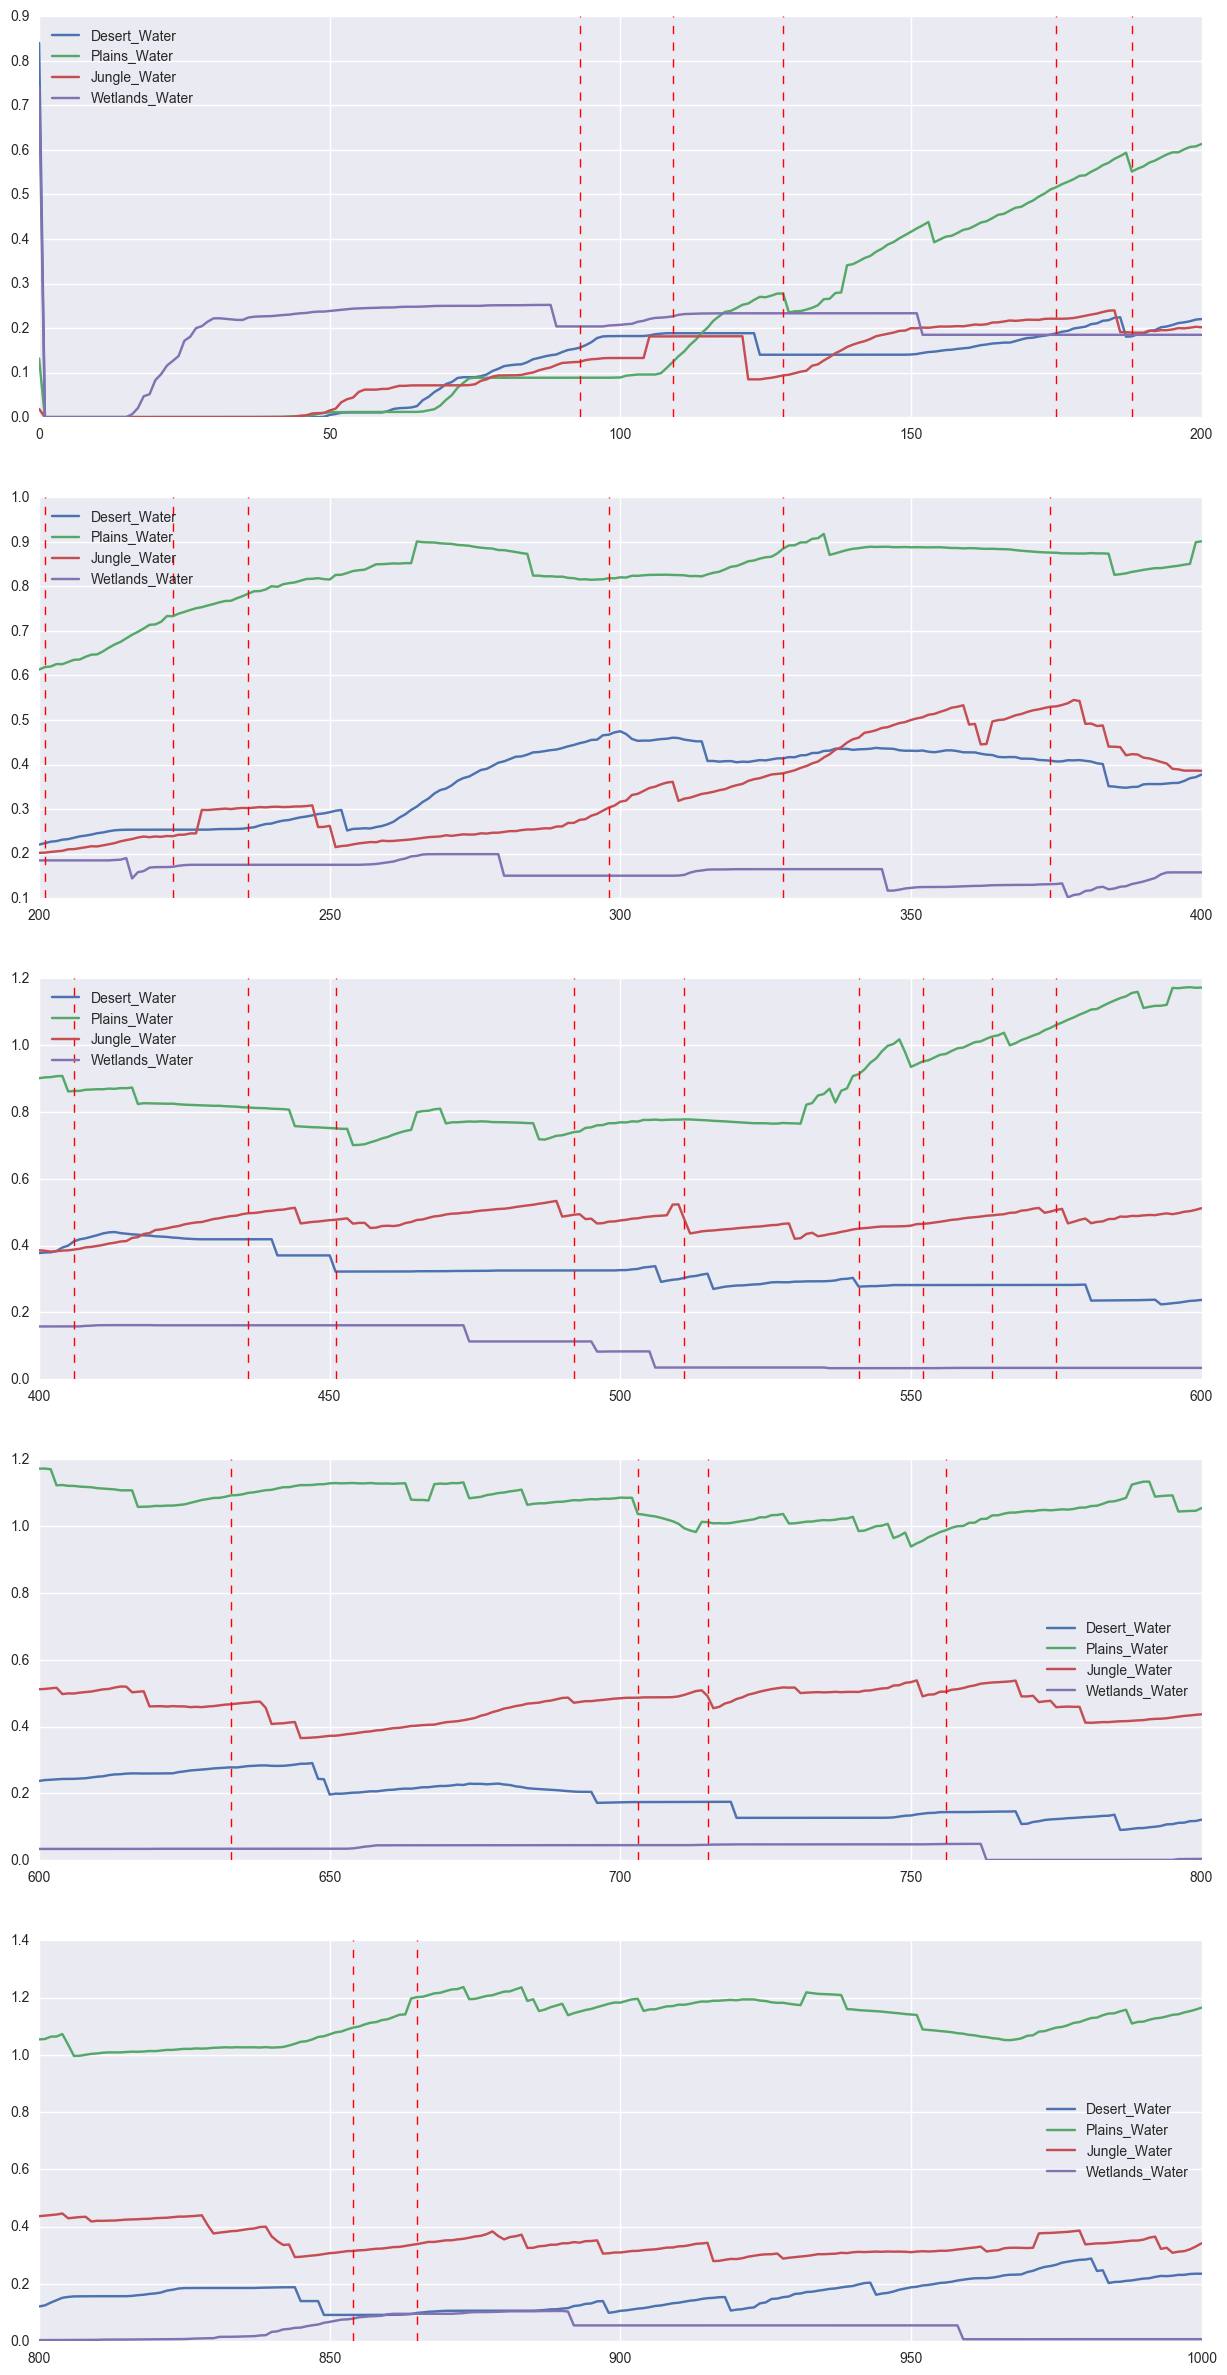

In [89]:
fig, axes = plt.subplots(5,1, figsize=(15,30))
water_subset = data[data.columns[data.columns.str.contains('Water') & (~data.columns.str.contains('Bins|Waterfall|Floor|Mountain|Reservoir'))]]

fig, axes = plt.subplots(5,1, figsize=(15,30))

count = 0
m = 200
for i,j in enumerate(np.arange(0,1000,m)):
    ax=axes[i]

    water_subset[water_subset.columns[~water_subset.columns.isin(['Total_Water'])]].ix[j:j+m].plot(ax=ax)
#     ax.set_ylabel('Water Amount')
#     ax1.set_xlabel('Time Step')

    # log_actions['translation'].plot(ax = ax1)
    # translation.plot(ax=ax1, alpha = 0.5)
    ix = series_diff.ix[j:j+m].index.values
    val = series_diff.ix[j:j+m].values
    for ix,v in series_diff.ix[j:j+m].iteritems():
        count += 1
        if v == True and count > 10:
            ax.axvline(ix, color='r', linestyle='--', lw=1)
            count = 0
#     series_diff.ix[j:j+100].plot(ax=ax, alpha = 0.5)

# fig.savefig('total_water.png')

plt.show()


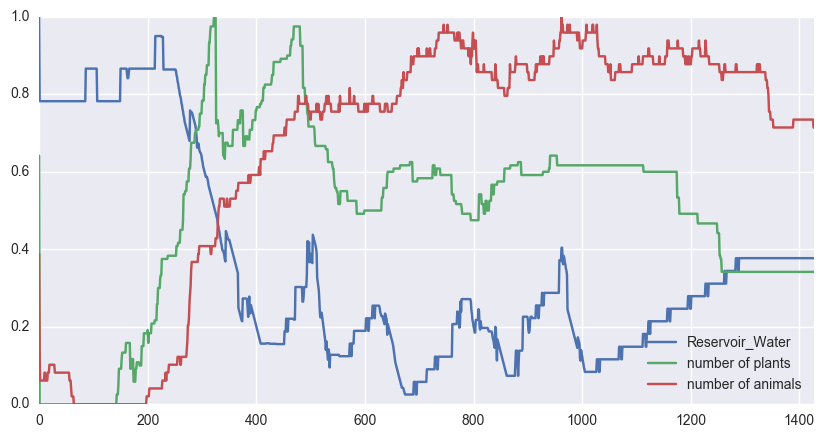

In [88]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

a = data[data.columns[data.columns.str.contains('Reservoir_Water')&(~data.columns.str.contains('Bins'))]]
(a/a.max()).plot(ax=ax)
b = data[data.columns[data.columns.str.contains('lv1|lv2|lv3|lv4')& (~data.columns.str.contains('Dead'))]].sum(axis=1)
(b/b.max()).plot(ax=ax, label='number of plants')
c = data[data.columns[data.columns.str.contains('Creatures')]].sum(axis=1)
(c/c.max()).plot(ax=ax, label='number of animals')

plt.legend(loc='best')
plt.show()

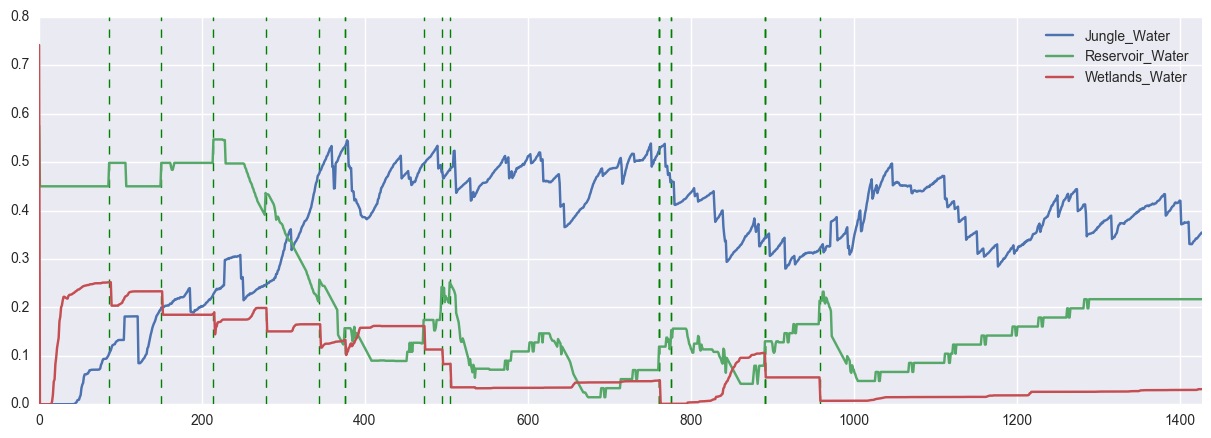

In [152]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
water_subset = data[data.columns[data.columns.str.contains('Reservoir_Water|Jungle_Water|Wetlands_Water') & (~data.columns.str.contains('Bins|Waterfall|Floor|Mountain'))]]
d1 = water_subset.Reservoir_Water.diff() > 0.03
d2 = (water_subset[['Jungle_Water', 'Wetlands_Water']].diff() < -0.045).any(axis=1)

for ix,v in d1.iteritems():
    
    for ix2,v2 in d2.ix[ix-10:ix+10].iteritems():
        if v == True and v2 == True:
            ax.axvline(ix, color='g', linestyle='--', lw=1)
water_subset.plot(ax=ax)
plt.show()